# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [260]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [261]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,Credit_History,50,91.856678
1,Self_Employed,32,94.788274
2,LoanAmount,22,96.416938
3,Dependents,15,97.557003
4,Loan_Amount_Term,14,97.719870
5,Gender,13,97.882736
6,Married,3,99.511401
7,Loan_ID,0,100.000000
8,Education,0,100.000000
9,ApplicantIncome,0,100.000000


Look at some basic statistics for numerical variables.

In [262]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [263]:
for col in df.columns:
    if df[col].dtypes == 'object':
        num_of_unique_cat = len (df[col].unique())
        print("Features '{col_name}' has '{unique_cat}' unique categories". format(col_name=col, unique_cat=num_of_unique_cat))

Features 'Loan_ID' has '614' unique categories
Features 'Gender' has '3' unique categories
Features 'Married' has '3' unique categories
Features 'Dependents' has '5' unique categories
Features 'Education' has '2' unique categories
Features 'Self_Employed' has '3' unique categories
Features 'Property_Area' has '3' unique categories
Features 'Loan_Status' has '2' unique categories


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:xlabel='Gender', ylabel='count'>

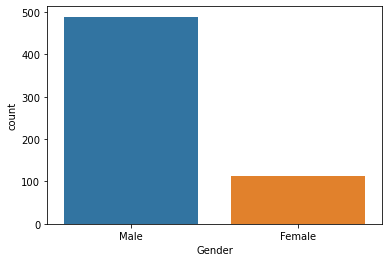

In [264]:
sns.countplot(x='Gender',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

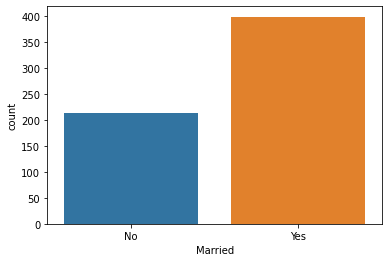

In [265]:
sns.countplot(x='Married',data=df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

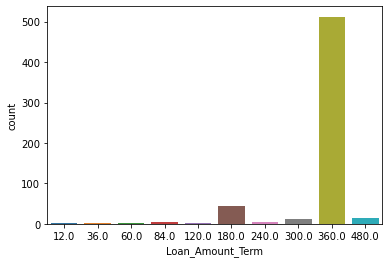

In [266]:
sns.countplot(x='Loan_Amount_Term',data=df)

Look at box plots to understand the distributions. 


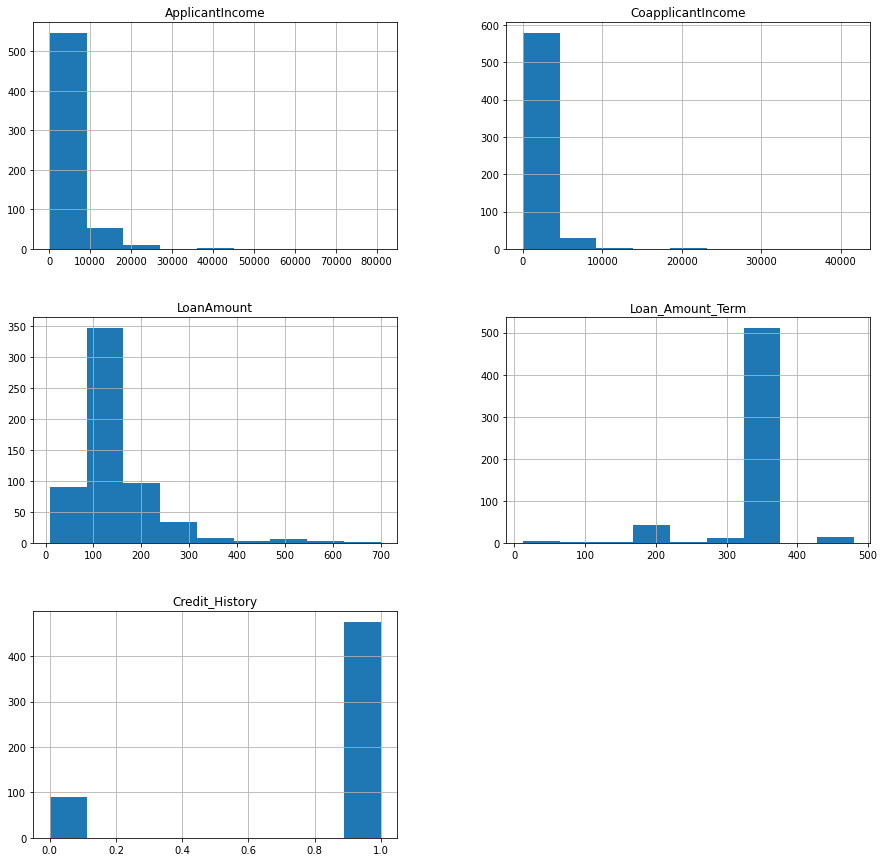

In [267]:
df.hist(figsize  = [15, 15],bins=9) 
plt.show()

Look at the distribution of income segregated  by `Education`

Text(0.5, 0.98, '')

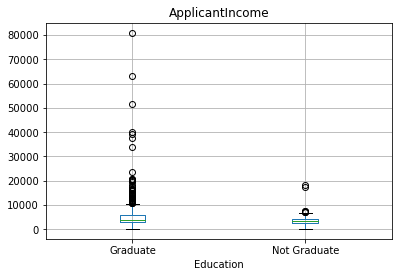

In [268]:
df.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle('')

Look at the histogram and boxplot of LoanAmount

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


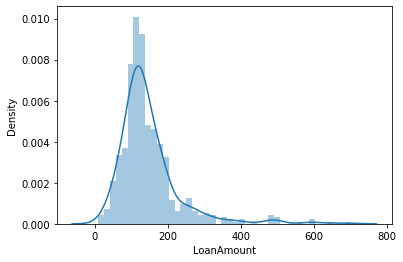

"df['LoanAmount'].plot.box(figsize=(16,5))\nplt.show()"

In [269]:
df.notna()
sns.distplot(df['LoanAmount'])
plt.show()
'''df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()'''

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [270]:
table = pd.pivot_table(data=df,index=['Loan_Amount_Term'])
table.head(2)


,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount
Loan_Amount_Term,,,,
12.0,4625.0,2857.0,NaN,111.0
36.0,3419.5,0.0,1.0,117.5


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [271]:
df['Credit_History'] = df['Credit_History'].fillna(0)
df['Dependents'] = df['Dependents'].fillna(0)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [272]:
df['Self_Employed'] = df['Self_Employed'].replace(np.nan, 'No')
df['Married'] = df['Married'].fillna('Yes')

In [273]:
df['Gender'] = df['Gender'].fillna('Female')

In [274]:
df.loc[df.Dependents=='3+','Dependents']= 4

In [275]:
df =df.drop('Loan_ID',axis=1)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:>

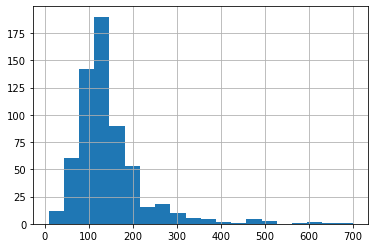

In [276]:
df['LoanAmount'].hist(bins=20)

<AxesSubplot:>

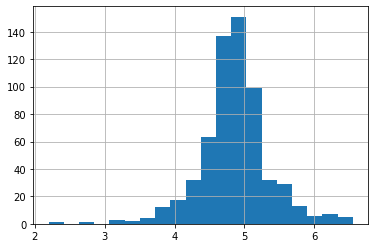

In [277]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Combine both incomes as total income and take a log transformation of the same.

In [278]:
df['total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

<AxesSubplot:>

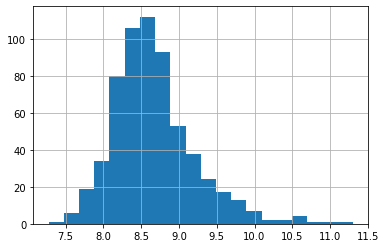

In [279]:
df['total_income_log']=np.log(df['total_income'])
df['total_income_log'].hist(bins=20)

## 4. Building a Predictive Model

In [280]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,total_income,total_income_log
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568


#### Convert Categorical variable with Numerical values.

In [281]:
df.Gender = df.Gender.replace({"Male": 1, "Female" : 0})

In [282]:
df.Married = df.Married.replace({"Yes": 1, "No" : 0})

In [283]:
df.Education = df.Education.replace({"Graduate": 1, "Not Graduate" : 0})

In [284]:
df.Self_Employed = df.Self_Employed.replace({"Yes": 1, "No" : 0})

In [285]:
df.Property_Area = df.Property_Area.replace({"Urban": 2, "Semiurban" : 1, "Rural" : 0})

In [286]:
df.Loan_Status = df.Loan_Status.replace({"Y": 1, "N" : 0})

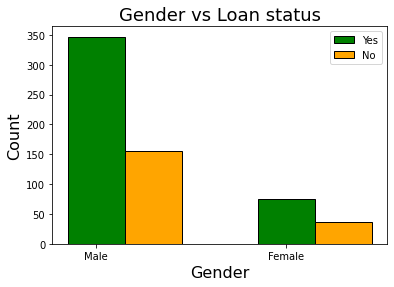

In [302]:
Gender = ['Male', 'Female']
Loan_Status = ['Yes', 'No']
pos= np.arange(len(Gender))
bar_width= 0.30
Loan_Status_Yes= [347,75]
Loan_Status_NO= [155,37]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Gender)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Gender vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

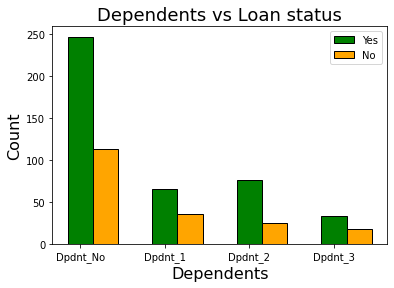

In [299]:
Dependents=['Dpdnt_No', 'Dpdnt_1', 'Dpdnt_2', 'Dpdnt_3']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Dependents))
bar_width=0.30
Loan_Status_Yes=[247,66,76,33]
Loan_Status_NO=[113,36,25,18]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Dependents)
plt.xlabel('Dependents', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Dependents vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

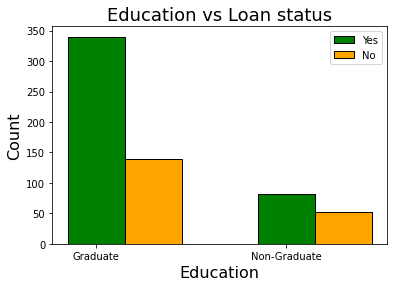

In [300]:
Education=['Graduate', 'Non-Graduate']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Education))
bar_width=0.30
Loan_Status_Yes=[340,82]
Loan_Status_NO=[140,52]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Education)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Education vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

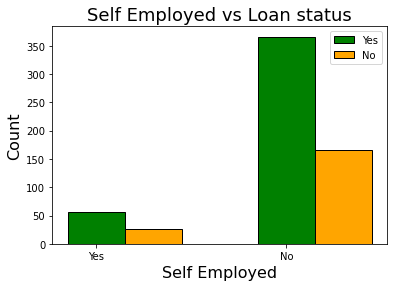

In [301]:
Self_Employed=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Self_Employed))
bar_width=0.30
Loan_Status_Yes=[56,366]
Loan_Status_NO=[26,166]

plt.bar(pos,Loan_Status_Yes,bar_width,color='green',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Self_Employed)
plt.xlabel('Self Employed', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Self Employed vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

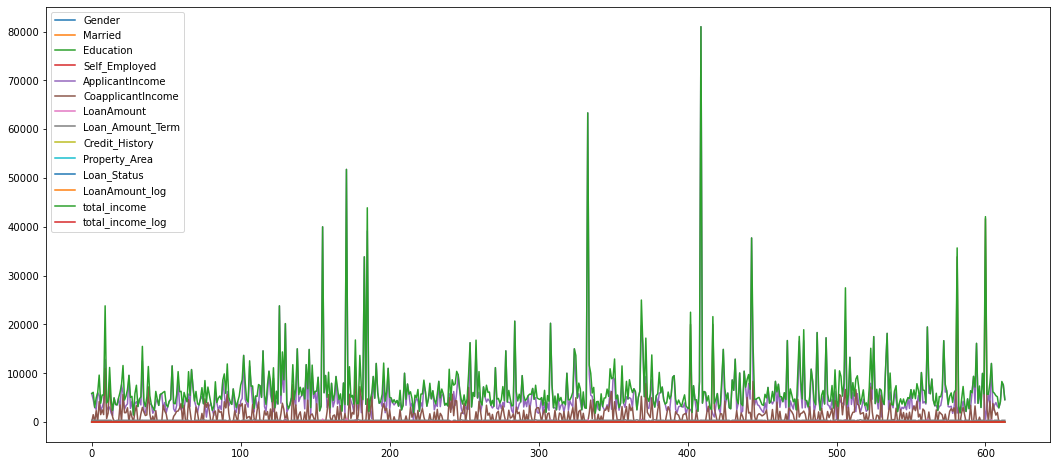

In [287]:
df.plot(figsize=(18, 8))
plt.show()

#### Traing the ML Model

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [289]:
X= df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

In [290]:
#Standardize the data - Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [292]:
model = LogisticRegression() #define the model
model.fit(X_train, y_train) #fit the model
ypred = model.predict(X_test) #predict on test sample
evaluation = f1_score(y_test, ypred)
evaluation

0.8677248677248678

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [293]:
import pickle as pkl

In [294]:
pkl.dump(model,open('model.pkl','wb'))

In [295]:
model = pkl.load(open('model.pkl','rb'))
print(model)

LogisticRegression()


In [296]:
from flask import Flask, request, jsonify, render_template

In [297]:
app = Flask(__name__)

In [298]:
model = pkl.load(open('model.pkl', 'rb'))